In [38]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from models import *

In [39]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_4096.pt', map_location ='cpu')



In [40]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

a['test_acc_array']

test accuracy: 77.62 87.46 85.79 

train loss: 0.3641876355385232 0.06496988160877812 0.030074273594296895


array([11.33, 23.59, 30.25, 41.18, 47.49, 61.91, 67.19, 72.41, 66.48,
       69.16, 74.87, 71.25, 72.22, 76.37, 69.21, 73.48, 75.78, 76.32,
       81.08, 80.93, 81.04, 77.31, 79.86, 79.19, 81.1 , 78.84, 77.78,
       80.72, 74.1 , 77.02, 81.76, 72.27, 78.01, 82.83, 79.84, 82.25,
       83.12, 80.4 , 82.94, 83.87, 80.35, 80.58, 83.05, 82.49, 78.41,
       82.26, 80.17, 85.12, 84.92, 76.36, 83.89, 82.81, 82.23, 80.12,
       82.66, 80.93, 82.45, 78.27, 83.37, 84.67, 78.4 , 81.56, 76.59,
       85.09, 78.69, 80.82, 82.27, 85.14, 82.21, 81.28, 84.46, 84.04,
       78.66, 85.11, 86.39, 84.74, 85.51, 84.51, 83.12, 84.37, 81.94,
       85.42, 86.74, 83.63, 82.27, 84.81, 87.86, 86.52, 86.94, 86.35,
       86.35, 85.97, 86.67, 86.48, 83.36, 85.03, 84.51, 82.94, 82.38,
       84.88, 83.35, 86.94, 86.63, 85.1 , 86.44, 85.8 , 88.3 , 85.9 ,
       88.02, 87.23, 86.96, 83.87, 87.77, 86.43, 85.15, 88.83, 88.24,
       87.03, 88.59, 86.36, 88.12, 89.7 , 87.16, 88.89, 88.85, 88.99,
       88.29, 88.34,

In [41]:
# Loading the nets

net1 = VGG('VGG19')
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = VGG('VGG19')
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = VGG('VGG19')
net3.load_state_dict(c['net'], strict=False)
net3.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [42]:
# # Loading the nets

# net1 = Linear_mnist()
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = Linear_mnist()
# net2.load_state_dict(aaa['net'], strict=False)
# net2.eval()

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.5141)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.4947)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.5141)


torch.Size([1, 3, 32, 32])

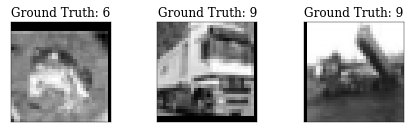

In [43]:
# loading the data

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
crop=32
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
input_dim = [1,3,32,32]
num_classes = 10

transform_train = transforms.Compose([
    transforms.RandomCrop(crop, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, 128, shuffle=False)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [44]:
# c = {} #the difference network
# d = 0
# for i in a['net']:
#     c[i] = a['net'][i]-b['net'][i]
#     d = d + (torch.norm(c[i].type(torch.FloatTensor)))**2

# d

# # net_diff = VGG('VGG19')
# net_diff.load_state_dict(c, strict=False)
# net_diff.eval()

In [45]:
Jac_1 = {}
Jac_2 = {}
Jac_3 = {}
# Jac_diff = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_3[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)
#     Jac_diff[i] = torch.autograd.functional.jacobian(net_diff, example_data[i:i+1,:,:,:], create_graph = True)

In [46]:
v_3 = np.zeros(20)
v_4 = np.zeros(20)


for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    v_3[i] = torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))), '\n')
    v_4[i] = torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))


on the datapoint 0 we have (1/2) tensor(0.9652, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(0.8702, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(0.9539, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(1.0098, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(0.8989, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(0.9622, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.8852, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(0.9367, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(0.9543, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.9852, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.0556, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(0.8889, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(0.9086, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [47]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-2)/1', torch.norm(Jac_1[i]-Jac_2[i])/torch.norm(Jac_1[i]))
#     print('on the datapoint', i, 'the difference of the two neural nets is', torch.norm(net_diff(example_data[i:i+1,:,:,:]))/torch.norm(net1(example_data[i:i+1,:,:,:])))

for i in range(20):
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-3)/1', torch.norm(Jac_1[i]-Jac_3[i])/torch.norm(Jac_1[i]))


on the datapoint 0 the difference of the two Jacobians is (1-2)/1 tensor(1.4356, grad_fn=<DivBackward0>)
on the datapoint 1 the difference of the two Jacobians is (1-2)/1 tensor(1.5192, grad_fn=<DivBackward0>)
on the datapoint 2 the difference of the two Jacobians is (1-2)/1 tensor(1.4455, grad_fn=<DivBackward0>)
on the datapoint 3 the difference of the two Jacobians is (1-2)/1 tensor(1.4060, grad_fn=<DivBackward0>)
on the datapoint 4 the difference of the two Jacobians is (1-2)/1 tensor(1.4896, grad_fn=<DivBackward0>)
on the datapoint 5 the difference of the two Jacobians is (1-2)/1 tensor(1.4408, grad_fn=<DivBackward0>)
on the datapoint 6 the difference of the two Jacobians is (1-2)/1 tensor(1.5093, grad_fn=<DivBackward0>)
on the datapoint 7 the difference of the two Jacobians is (1-2)/1 tensor(1.4589, grad_fn=<DivBackward0>)
on the datapoint 8 the difference of the two Jacobians is (1-2)/1 tensor(1.4397, grad_fn=<DivBackward0>)
on the datapoint 9 the difference of the two Jacobians 

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.5141)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.2233)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.3784)


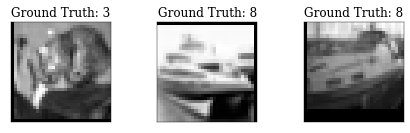

In [48]:
# loading the data - TEST


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(
    testset, 128, shuffle=False)

# plot 6 examples of data point
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()


Jac_4 = {}
Jac_5 = {}
Jac_6 = {}

for i in range(20):
    Jac_4[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_5[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_6[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)

In [49]:
v_1 = np.zeros(20)
v_2 = np.zeros(20)

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))), '\n')
    
    v_1[i] = torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))), '\n')
    
    v_2[i] = torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))
    


on the datapoint 0 we have (1/2) tensor(0.8940, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(0.8954, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(0.9207, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(0.8709, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(0.9000, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(1.0120, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.9364, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(0.9758, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(0.8595, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.8701, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(0.9388, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(0.9009, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(0.9582, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [50]:
v_2

array([0.86969334, 0.9396314 , 0.89440644, 0.96857023, 0.90239429,
       0.85202736, 0.83603752, 0.85551989, 0.97192568, 0.88440812,
       0.98074162, 0.87131965, 0.85867006, 0.88759917, 0.83966774,
       0.95237106, 0.90841693, 0.87013644, 0.89794499, 0.87160271])

# Plotting the results

In [51]:
toplot = {
    'test - 1/2': {'color': 'C0'},
    'train - 1/2': { 'color': "C1"},
    'test - 1/3': {'color': 'C2'},
    'train - 1/3': { 'color': "C3"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'train - 1/2':
           # accuracy_adam = mean_ad
            results[label] = v_3
        if label == 'test - 1/2':
          #  accuracy_da = mean
            results[label] = v_1
        if label == 'train - 1/3':
           # accuracy_adam = mean_ad
            results[label] = v_4
        if label == 'test - 1/3':
          #  accuracy_da = mean
            results[label] = v_2
            
            
# accuracy = {}

# for label, fields in toplot.items():
#         if label == 'train - 0.2':
#            # accuracy_adam = mean_ad
#             accuracy[label] = ('Train loss '+ (b['train_loss_array'][-1].astype('str'))[:6])
#         if label == 'test - 0.2':
#           #  accuracy_da = mean
#             accuracy[label] = ('Test accuracy '+str(b['best_acc']))
#         if label == 'train - 0.5':
#            # accuracy_adam = mean_ad
#             accuracy[label] = ('Train loss '+(c['train_loss_array'][-1].astype('str'))[:6])
#         if label == 'test - 0.5':
#           #  accuracy_da = mean
#             accuracy[label] = ('Test accuracy '+str(c['best_acc']))

In [52]:
# accuracy

Saved jacobian_norm_ratio_0706_1_400.pdf


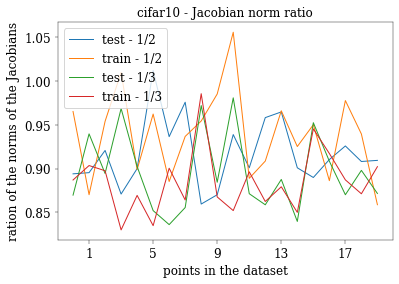

In [53]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp, arr_data, label=label)

plt.xticks(range(1,21,4))
ax.set_xlabel('points in the dataset')
ax.set_ylabel('ration of the norms of the Jacobians')
ax.set_title("cifar10 - Jacobian norm ratio")
ax.legend(loc='upper left')

fname = "jacobian_norm_ratio_0706_1_400.pdf"
plt.savefig(fname)
print(f"Saved {fname}")